In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, recall_score, precision_score, f1_score

In [3]:
data = pd.read_csv("/content/sample_data/Pharma_Industry.csv")

In [5]:
df = pd.DataFrame(data)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


In [7]:
df.isnull().sum()

,0
Drug Dosage (mg),0
Systolic Blood Pressure (mmHg),0
Heart Rate (BPM),0
Liver Toxicity Index (U/L),0
Blood Glucose Level (mg/dL),0
Drug Response,0


In [8]:
df.describe()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000
mean,-0.037761,0.214957,0.062871,0.054398,-0.171863,0.5200
std,0.979891,1.247567,0.971978,0.986001,0.983765,0.5001
min,-3.019512,-3.773897,-2.940389,-3.401277,-3.110431,0.0000
25%,-0.642003,-0.565168,-0.648157,-0.586085,-0.797715,0.0000
50%,-0.019340,0.201532,0.027732,-0.065661,-0.108106,1.0000
75%,0.641151,0.951375,0.710774,0.633914,0.513555,1.0000
max,2.949094,4.111751,3.193108,3.373269,2.518023,1.0000


In [9]:
df.dtypes

,0
Drug Dosage (mg),float64
Systolic Blood Pressure (mmHg),float64
Heart Rate (BPM),float64
Liver Toxicity Index (U/L),float64
Blood Glucose Level (mg/dL),float64
Drug Response,int64


In [10]:
df.columns

Index(['Drug Dosage (mg)', 'Systolic Blood Pressure (mmHg)',
       'Heart Rate (BPM)', 'Liver Toxicity Index (U/L)',
       'Blood Glucose Level (mg/dL)', 'Drug Response'],
      dtype='object')

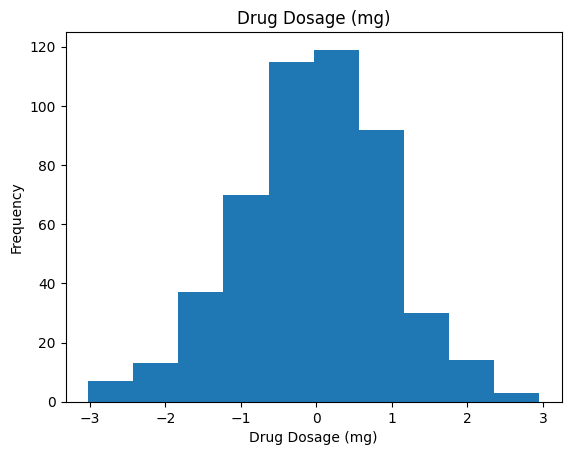

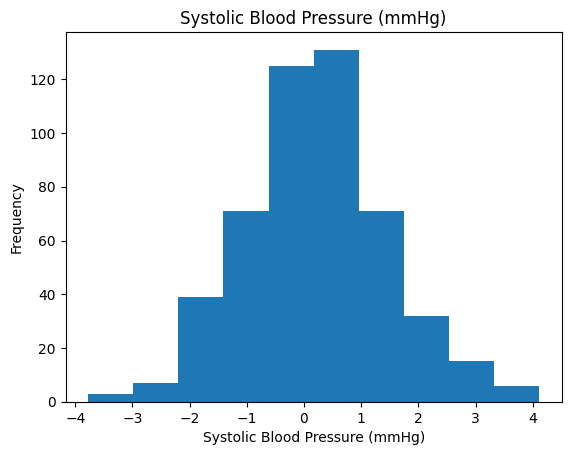

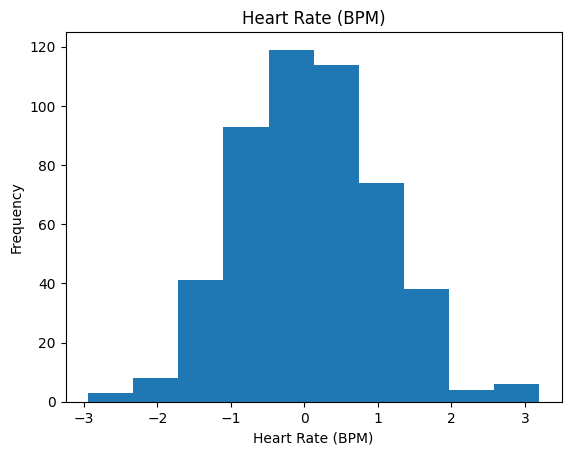

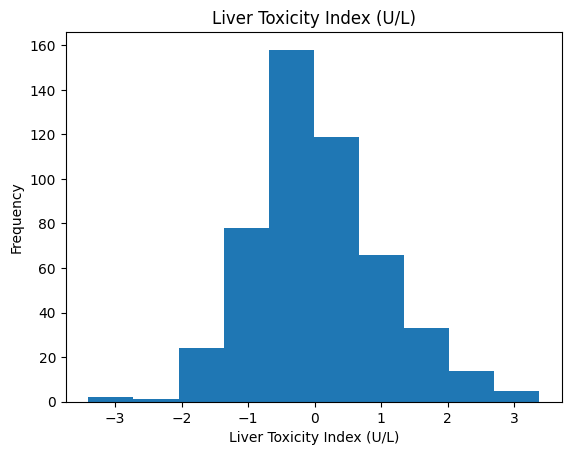

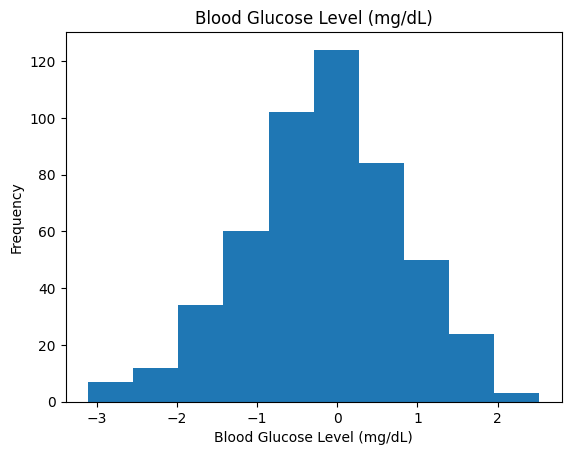

In [11]:
#Visualization using Histogram plot for all columns excluding a Drug Response because it is outcome
all_col = df.columns.tolist()

col_to_exclude = 'Drug Response'

columns_to_plot = [col for col in all_col if col != col_to_exclude]
#ploting the histogram
for col in columns_to_plot:
  plt.hist(df[col])
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.show()

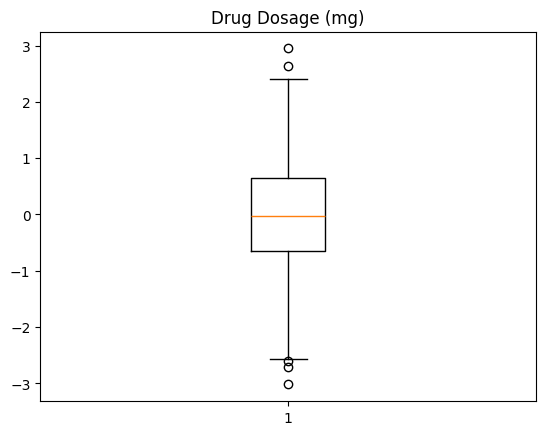

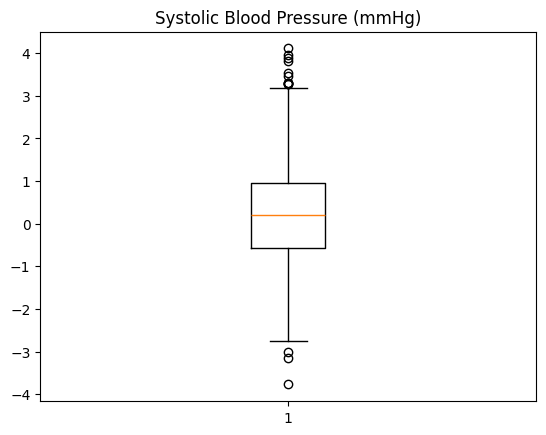

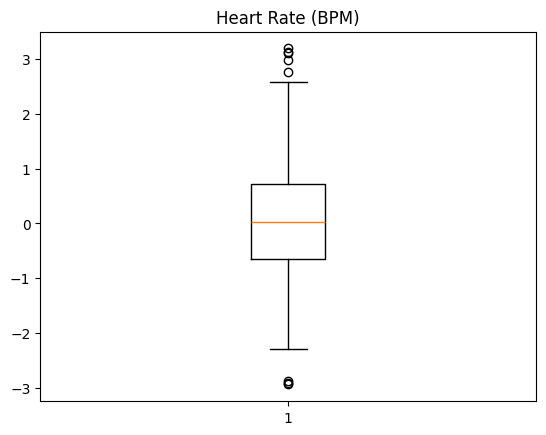

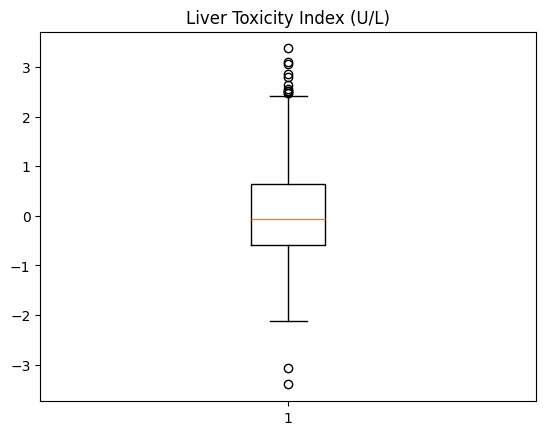

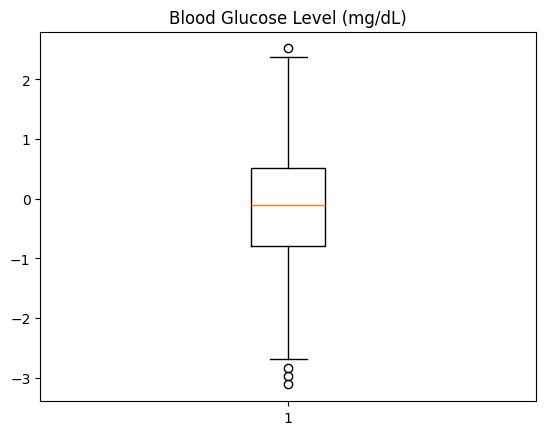

In [12]:
#Visualisation of Box plot
for col in columns_to_plot:
  plt.boxplot(df[col])
  plt.title(col)
  plt.show()

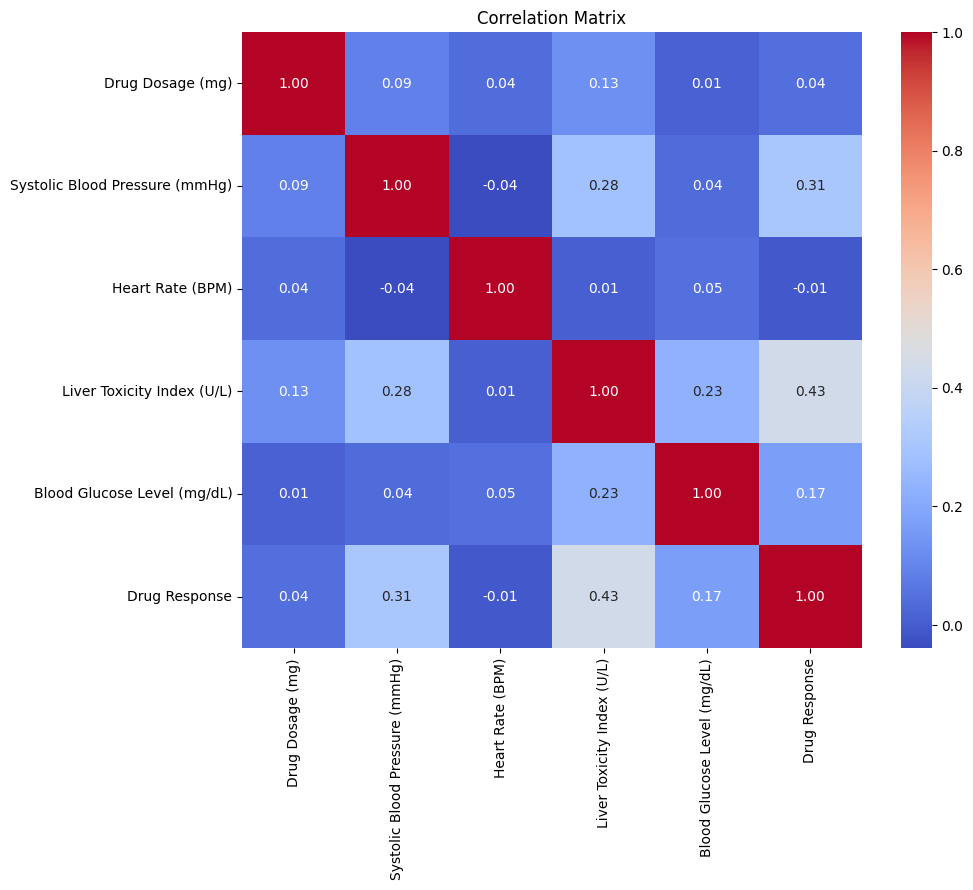

In [13]:
#calculating and Visualisation of Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder
#Label Encoding
label_encoder = LabelEncoder()
df['Drug Response'] = label_encoder.fit_transform(df['Drug Response'])
display(df['Drug Response'])

,Drug Response
0,1
1,1
2,0
3,1
4,1
...,...
495,0
496,1
497,1
498,0


In [16]:
#Traing and Testing
X = df.drop('Drug Response', axis=1)
y = df['Drug Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
#Splitting the Data into training and testing
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (400, 5)
X_test shape: (100, 5)
y_train shape: (400,)
y_test shape: (100,)


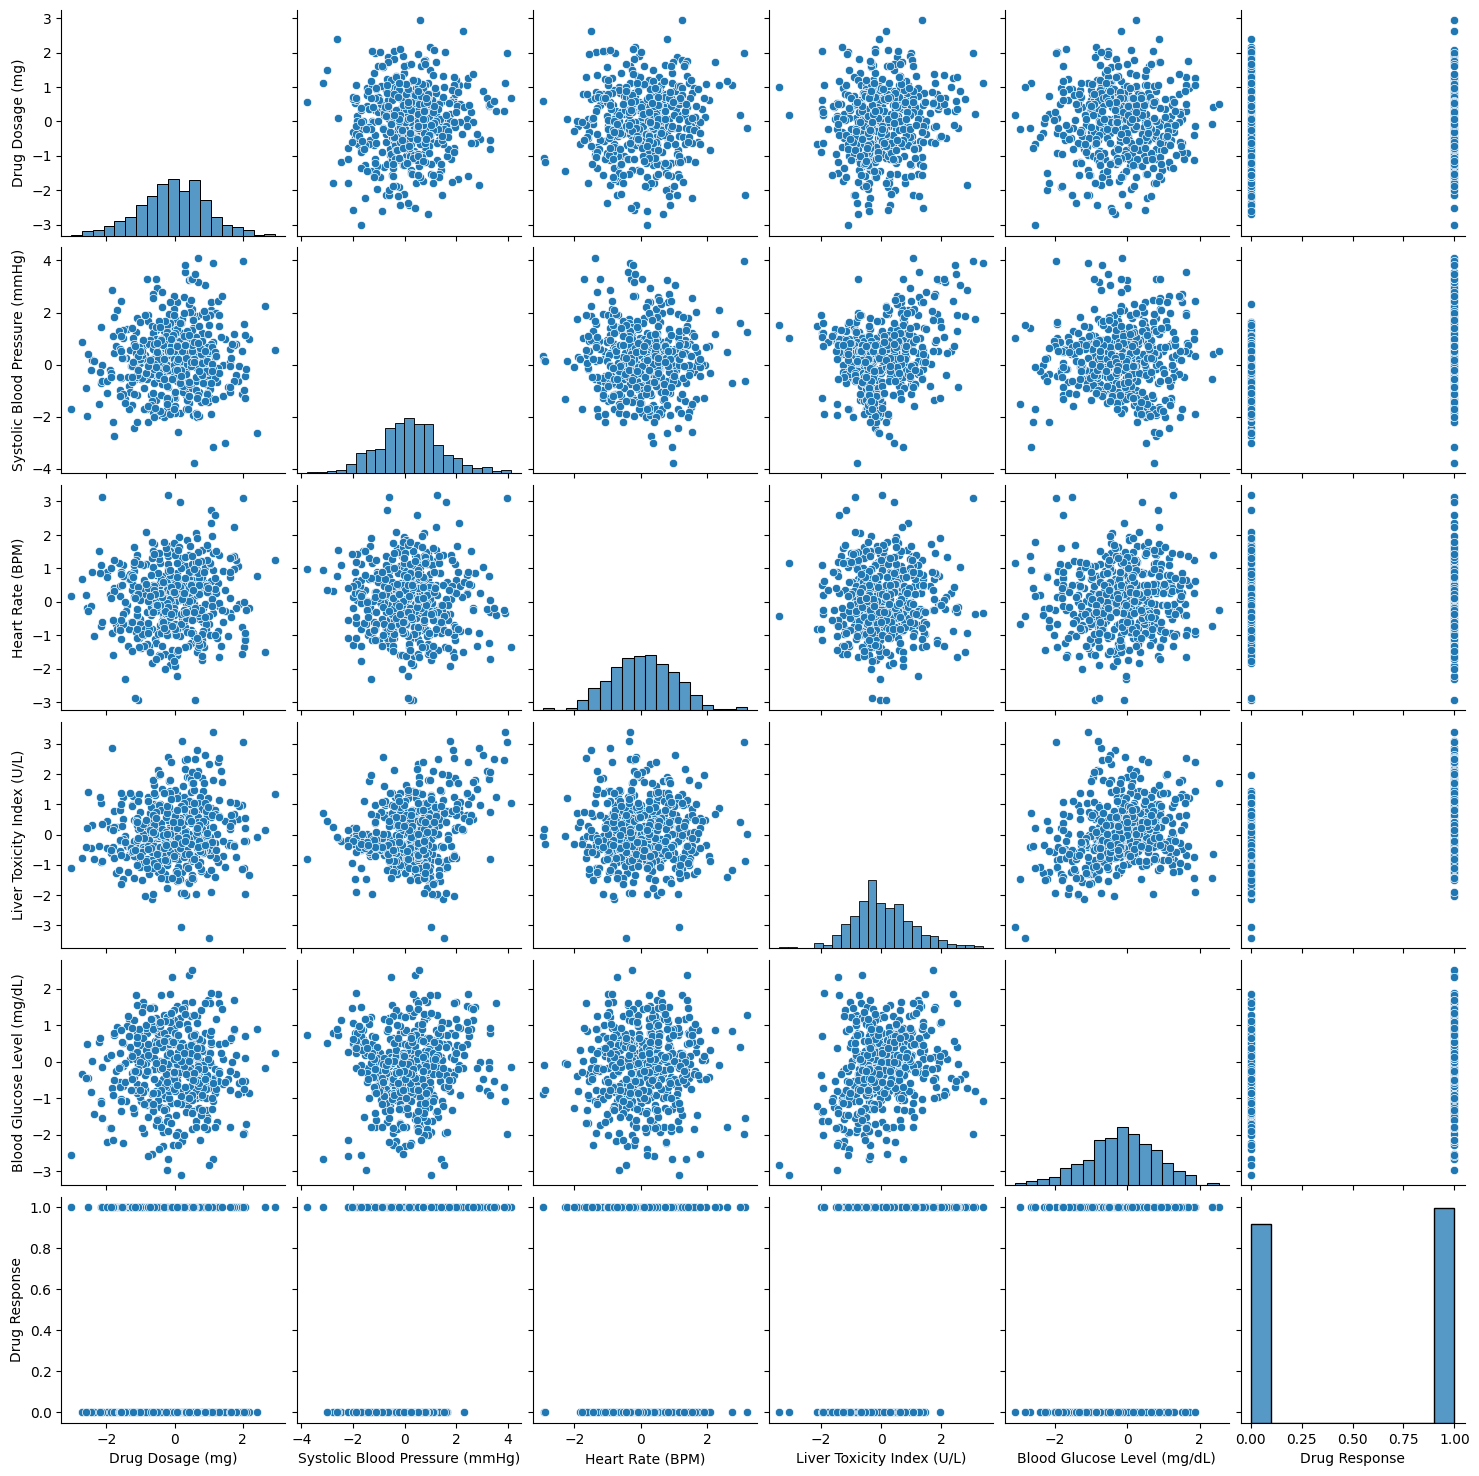

In [23]:
#Visualization using pairplot
sns.pairplot(df)
plt.show()

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Initialize the SVM classifier
svm_model = SVC(random_state=42)

# Train the model on the training data
svm_model.fit(X_train, y_train)

#Make predictions on trained data
y_pred = svm_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.84      0.80        44
           1       0.87      0.80      0.83        56

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100



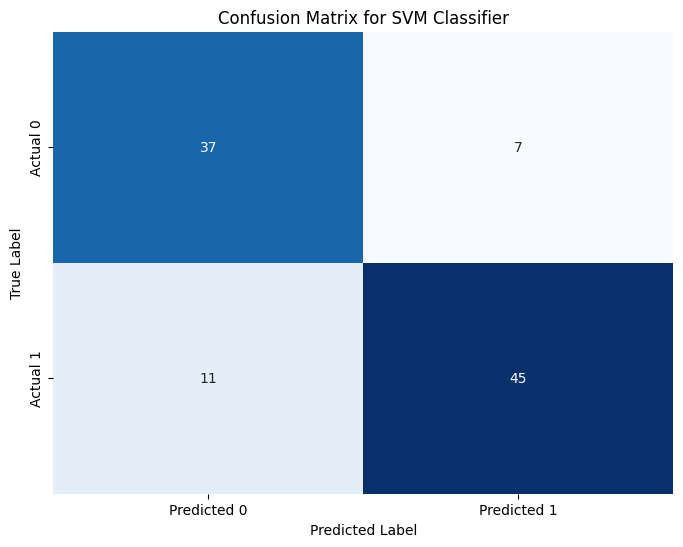

In [25]:
#Visualization of SVM Results
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

#plot the confusion matrix as heat map
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM Classifier')
plt.show()

In [32]:
#Parameter tuning using Hyperparameter grid and Optimisation
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly']
}

print("Hyperparameter grid defined:")
print(param_grid)

Hyperparameter grid defined:
{'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly']}


In [33]:
from sklearn.model_selection import GridSearchCV

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=SVC(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

print("GridSearchCV initialized with the following parameters:")
print(f"Estimator: {grid_search.estimator}")
print(f"Parameter Grid: {grid_search.param_grid}")
print(f"Cross-validation folds: {grid_search.cv}")
print(f"Scoring metric: {grid_search.scoring}")

GridSearchCV initialized with the following parameters:
Estimator: SVC(random_state=42)
Parameter Grid: {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly']}
Cross-validation folds: 5
Scoring metric: accuracy


In [35]:
grid_search.fit(X_train, y_train)
print("Best parameters found:",grid_search.best_score_)
print("Best cross-validation score:",grid_search.best_score_)

Best parameters found: 0.7375
Best cross-validation score: 0.7375


In [36]:
best_svm_model = grid_search.best_estimator_

y_pred_optimized = best_svm_model.predict(X_test)

print("Predictions made using the optimized SVM model.")

Predictions made using the optimized SVM model.


In [38]:
#Comparing SVM Performance with Various Kernels

results = pd.DataFrame(grid_search.cv_results_)

kernel_performance = results[['param_kernel', 'param_C', 'mean_test_score']]

best_kernel_scores = kernel_performance.loc[kernel_performance.groupby('param_kernel')['mean_test_score'].idxmax()]

print("Best cross-validation scores for each kernel type:")
display(best_kernel_scores.sort_values(by='mean_test_score', ascending=False))

Best cross-validation scores for each kernel type:


,param_kernel,param_C,mean_test_score
4,rbf,1.0,0.7375
0,linear,0.1,0.6950
5,poly,1.0,0.6700


/tmp/ipython-input-1707890773.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='param_kernel', y='mean_test_score', data=best_kernel_scores, palette='viridis')


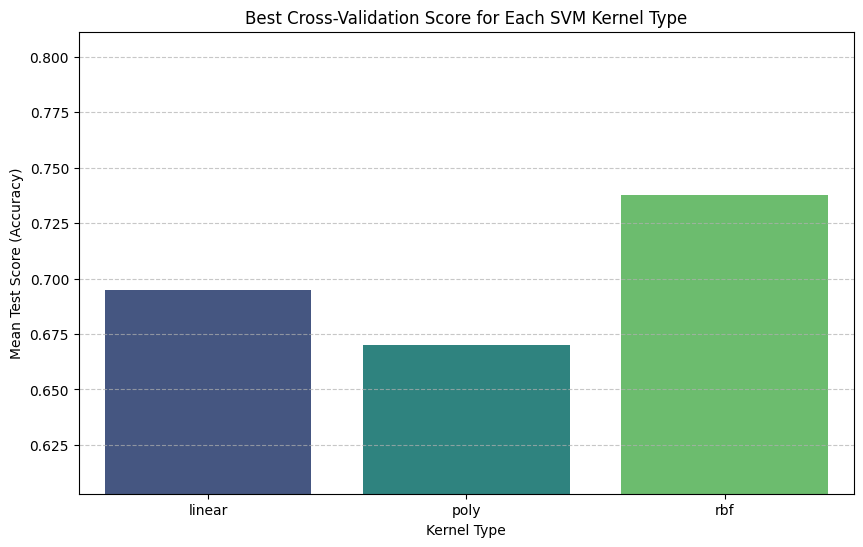

In [39]:
#Visualise Kernel Performance

plt.figure(figsize=(10, 6))
sns.barplot(x='param_kernel', y='mean_test_score', data=best_kernel_scores, palette='viridis')
plt.title('Best Cross-Validation Score for Each SVM Kernel Type')
plt.xlabel('Kernel Type')
plt.ylabel('Mean Test Score (Accuracy)')
plt.ylim(best_kernel_scores['mean_test_score'].min() * 0.9, best_kernel_scores['mean_test_score'].max() * 1.1) # Adjust y-axis limits
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Analysis of Kernel Performance Visualization:**

The bar plot clearly illustrates the relative performance of each SVM kernel type in terms of their best CV Scores:

1. **RBF Kernel:** The bar corresponding to the 'rbf' kernel is significantly taller than the others, indicating its superior performance with the highest mean test score.
2. **Linear Kernel:** The linear kernel shows a moderate performance, lower than  rbf' but better than poly.
3. **Polynomial Kernel:** The poly kernel exhibits the lowest performance, with the shortest bar.

**The practical implications of SVM in real-world classification tasks are:**
1. Medical Diagnosis and Prognosis.
2. Image Recognition and Computer Vision.
3. Test Classification and Sentiment Analysis.
4. Bioinformatics.
5. Finance.